In [8]:
import os
import numpy as np
import cv2
import math
from scipy import ndimage
from skimage.util import random_noise, invert
from skimage import io
from keras.models import load_model
from keras.preprocessing import image
from matplotlib import pyplot as plt

In [9]:
label_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
               '-', '(', ')', '+', 'alpha', 'beta', 'theta',
               'a', 'b', 'i', 'j', 'k', 'm', 'n', 't', 'x', 'y', 'z']
label_names_dict = dict()
for label,no in zip(label_names,list(range(len(label_names)))):
    label_names_dict[label] = no
print(label_names_dict)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '-': 10, '(': 11, ')': 12, '+': 13, 'alpha': 14, 'beta': 15, 'theta': 16, 'a': 17, 'b': 18, 'i': 19, 'j': 20, 'k': 21, 'm': 22, 'n': 23, 't': 24, 'x': 25, 'y': 26, 'z': 27}


In [10]:
def normalize_single(symbol):
    symbol = np.copy(symbol)
    symbol = symbol / np.max(symbol)
    rows, cols = symbol.shape
    # scale to 40x40
    inner_size = 40
    if rows > cols:
        factor = inner_size/rows
        rows = inner_size
        cols = int(round(cols*factor))
        inner = cv2.resize(symbol, (cols,rows))
    else:
        factor = inner_size/cols
        cols = inner_size
        rows = int(round(rows*factor))
        inner = cv2.resize(symbol, (cols, rows))

    # pad to 48x48
    outer_size = 48
    colsPadding = (int(math.ceil((outer_size-cols)/2.0)),int(math.floor((outer_size-cols)/2.0)))
    rowsPadding = (int(math.ceil((outer_size-rows)/2.0)),int(math.floor((outer_size-rows)/2.0)))
    outer = np.pad(inner,(rowsPadding,colsPadding),'constant', constant_values=(1,1))
    
    # center the mass
#     shiftx,shifty = getBestShift(outer)
#     shifted = shift(outer,shiftx,shifty)
    return outer
    
def getBestShift(img):
    inv = invert(img)
    cy,cx = ndimage.measurements.center_of_mass(img)

    rows,cols = img.shape
    shiftx = np.round(cols/2.0-cx).astype(int)
    shifty = np.round(rows/2.0-cy).astype(int)

    return shiftx,shifty

def shift(img,sx,sy):
    rows,cols = img.shape
    M = np.float32([[1,0,sx],[0,1,sy]])
    shifted = cv2.warpAffine(img,M,(cols,rows), borderValue=1)
    return shifted
def predict(images):
    symbols=[]
    

-- Predict --


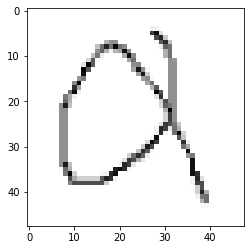

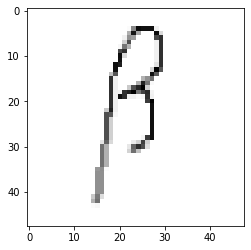

(2, 48, 48)
(2, 48, 48, 1)
['alpha']
['beta']


In [58]:
model = load_model('norm_ext_v1.h5')
mean_tr = np.load('mean_tr.npy')
std_tr = np.load('std_tr.npy')
print("-- Predict --")

target=[]

img = cv2.imread('testset_1/alpha/alpha.png', cv2.IMREAD_GRAYSCALE)
(thresh, img) = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

img = normalize_single(img)
plt.imshow(img, cmap='gray')
plt.show()
img-=mean_tr
img/=std_tr
target.append(img)

img = cv2.imread('testset_1/beta/beta.png', cv2.IMREAD_GRAYSCALE)
(thresh, img) = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
img = normalize_single(img)
plt.imshow(img, cmap='gray')
plt.show()
img-=mean_tr
img/=std_tr
target.append(img)


# print(img.shape)

x = image.img_to_array(target)
print(x.shape)
x = np.expand_dims(x, axis=3)
print(x.shape)
# name_cls = test_generator.class_indices
# print(name_cls)
    
rst = model.predict_classes(x)
for sym in rst:
    print([name for name, val in label_names_dict.items() if val == sym])